In [1]:
from keras.applications.vgg16 import VGG16


In [4]:
for i in range(len(model.layers)):

    if 'conv' not in model.layers[i].name:
        continue

    filters, biases = model.layers[i].get_weights()
    print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [3]:
model = VGG16()

553467096/553467096 [==============================] - 93s 0us/step


In [5]:
filters , bias = model.layers[1].get_weights()

In [6]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

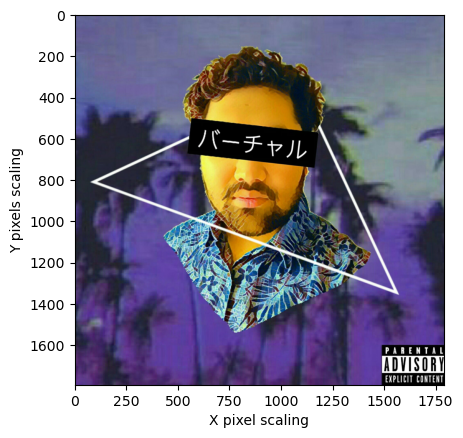

In [4]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread(r"C:\Users\rng8....jpg")
plt.imshow(image)
plt.show()

In [61]:
image = load_img(r"C:\Users\rng8....jpg" , target_size=(224,224))

image = img_to_array(image)
image = tf.expand_dims(image, axis=0)

image = preprocess_input(image)

In [46]:
model2 = VGG16()

In [64]:
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

In [49]:
from keras.models import Model

1/1 [==============================] - 0s 115ms/step


ValueError: num must be an integer with 1 <= num <= 64, not 65

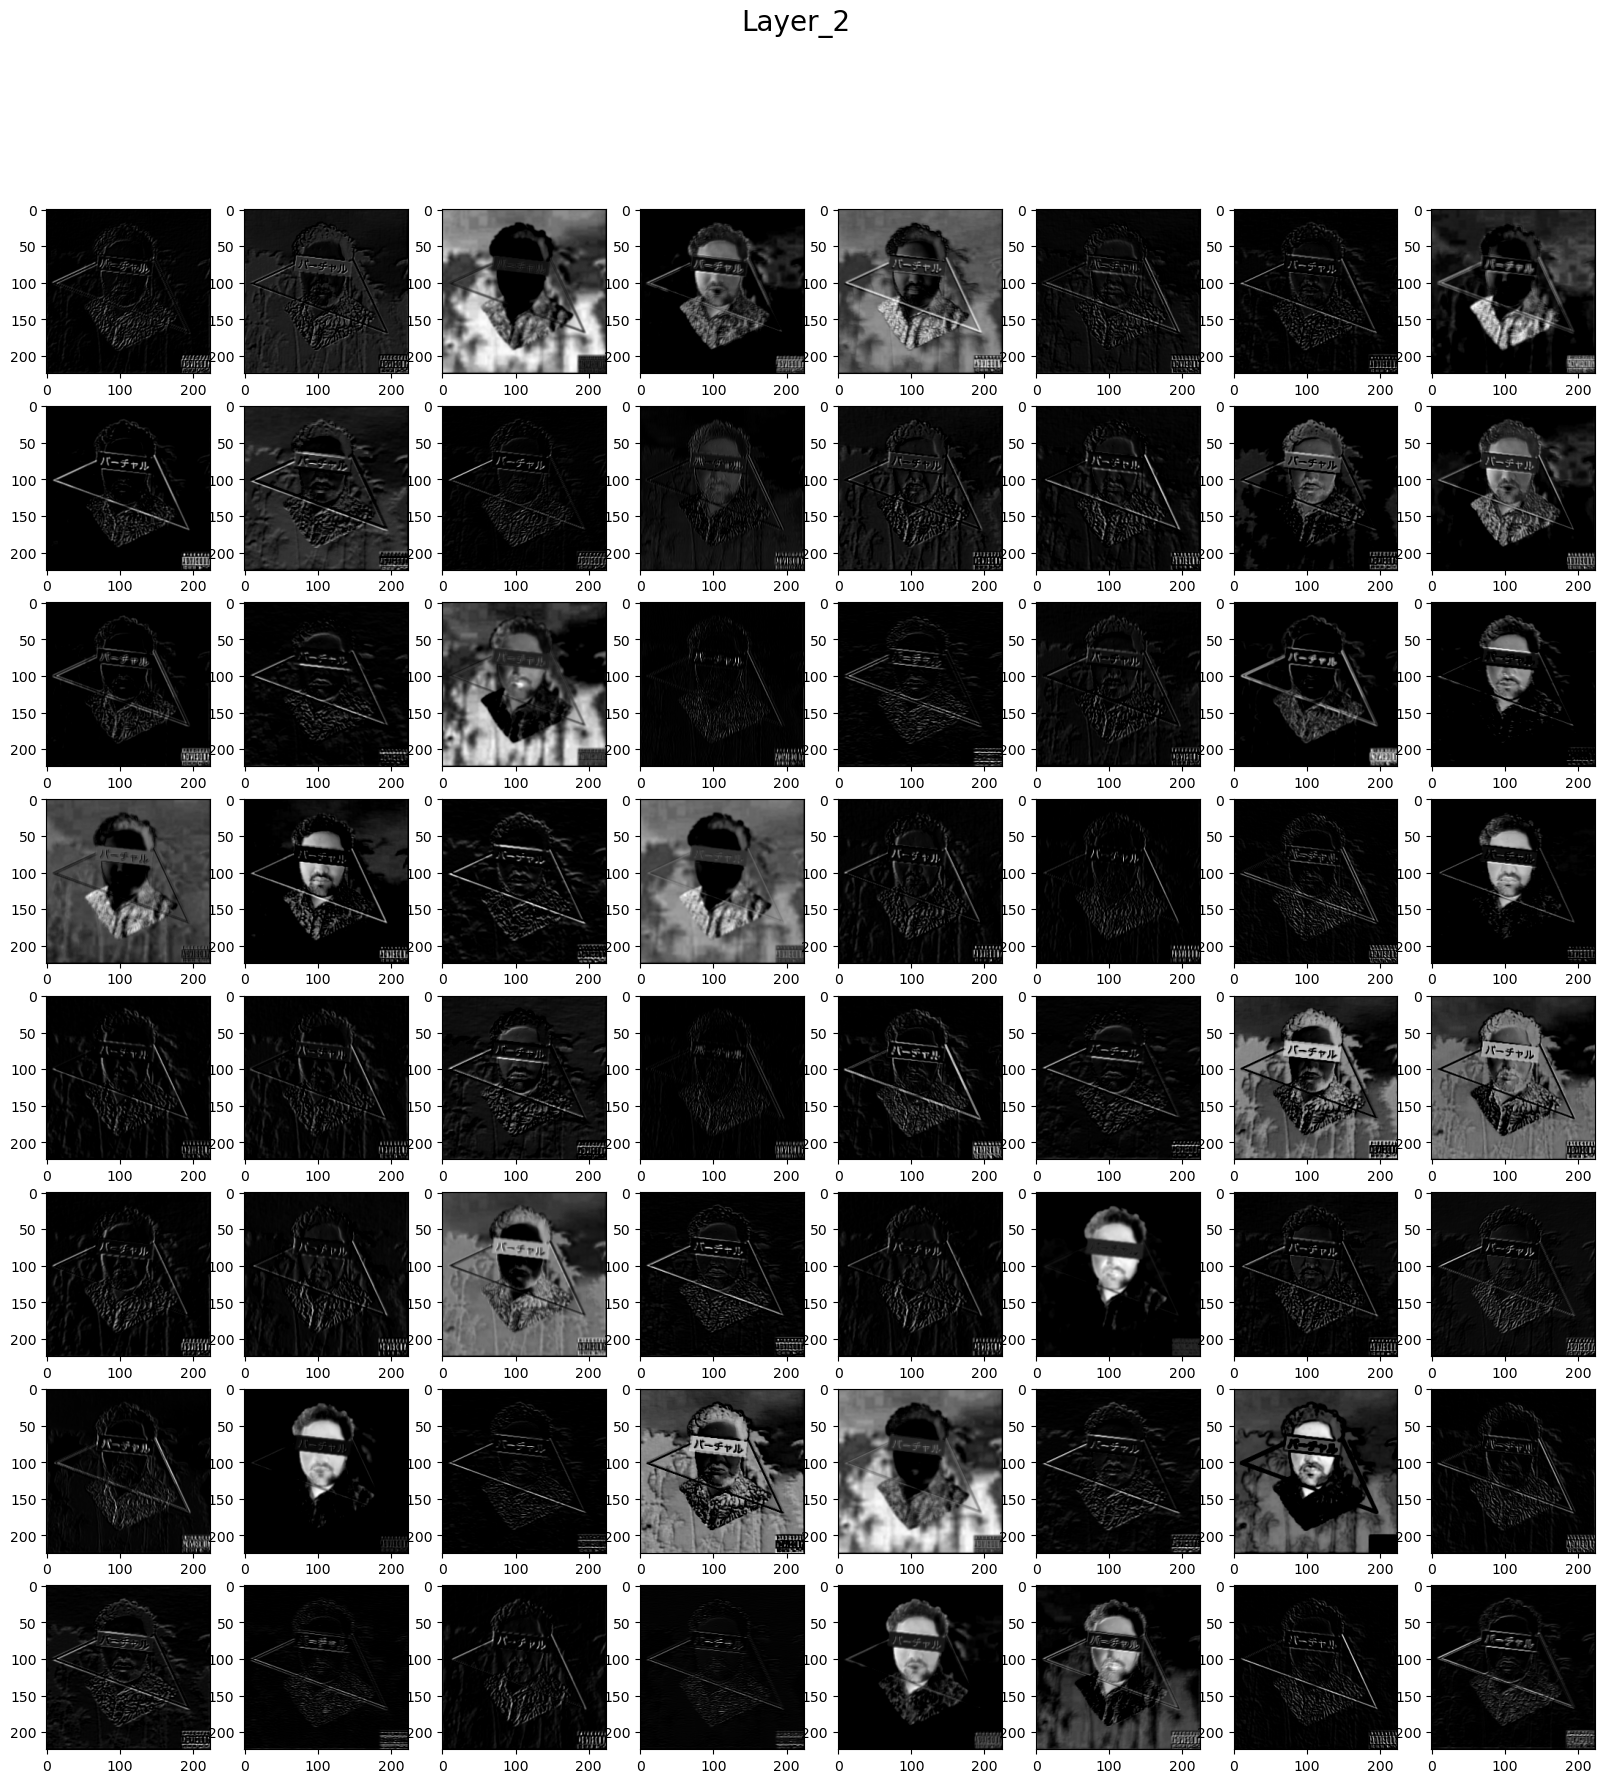

In [73]:
feature_map = model3.predict(image)

for i,fmap in zip(layer_index,feature_map):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[1]+1):

        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')

plt.show()